In [ ]:
import tensorflow as tf

print(tf.__version__)

### 1、tensorflow单个神经元做线性拟合

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model = keras.Sequential([keras.layers.Dense(units=1,input_shape=[1])])
model.compile(optimizer = "sgd", loss = "mean_squared_error")

# y=2*x-1
xs = np.array([-1.0,0.0,1.0,2.0,3.0,4.0],dtype=float)
ys = np.array([-3.0,-1.0,1.0,3.0,5.0,7.0],dtype=float)

model.fit(xs,ys,epochs=500)

model.predict([10.0])

### 2、Hello world - Fashion MNIST 

(60000, 28, 28) (10000, 28, 28)


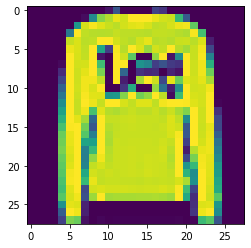

In [67]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) =fashion_mnist.load_data()

print(train_images.shape,test_images.shape)
plt.imshow(test_images[1])

In [56]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#训练回调函数
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch,logs={}):
        if(logs.get('loss') < 0.3):
            print("\nLoss is low so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) =fashion_mnist.load_data()

train_images_scaled = train_images/255.0
test_images_scaled = test_images/255.0

print("\ntrain images shap:", train_images_scaled.shape, "test images shap:",test_images_scaled.shape,"\n")

model =keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

model.summary()

model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.sparse_categorical_crossentropy,metrics="accuracy")
model.fit(train_images_scaled, train_labels,epochs=10,callbacks=[callbacks])

print("\nmodel evaluate:")
model.evaluate(test_images_scaled,test_labels)


train images shap: (60000, 28, 28) test images shap: (10000, 28, 28) 

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_39 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4944 - accuracy: 0.8253
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3755 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3351 - accuracy: 0.8780

[0.3552113175392151, 0.8726999759674072]

In [57]:
model.evaluate(test_images_scaled,test_labels)

(10000, 28, 28)


In [1]:
test(2)

NameError: name 'test' is not defined

### 3、 MNIST 手写数字识别

In [61]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


In [62]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2968 - accuracy: 0.9129
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1413 - accuracy: 0.9584
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1053 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0860 - accuracy: 0.9732
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0720 - accuracy: 0.9779
313/313 - 0s - loss: 0.0719 - accuracy: 0.9767


[0.07185233384370804, 0.9767000079154968]

In [64]:
def mnist_test(ident):
    predict_results = model.predict(tf.reshape(x_test[ident],shape=(1,28,28)))
    print(predict_results)
    print("Presivt:",np.argmax(predict_results),"     Practical:",y_test[ident])
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(x_test[ident])
    plt.subplot(1,2,2)
    plt.imshow(predict_results)

print(test_images.shape)

(10000, 28, 28)


[[1.03632850e-07 2.95971656e-08 3.32082942e-04 9.94746983e-01
  1.17761105e-11 4.35250672e-03 3.61039709e-09 1.52721782e-08
  5.68068644e-04 2.14961730e-07]]
Presivt: 3      Practical: 3


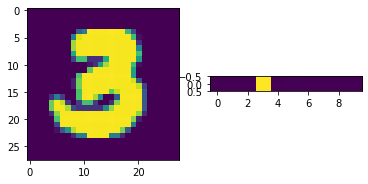

In [66]:
mnist_test(200)

### 4、Convolutional Neural Network —— CNN 

In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

data_type = "mnist"  #fashion_mnist
#训练回调函数
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch,logs={}):
        if(logs.get('loss') < 0.001):
            print("\nLoss is low so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

if data_type == "mnist":
  mnist = tf.keras.datasets.mnist
  (train_images, train_labels),(test_images, test_labels) = mnist.load_data()
else:
  fashion_mnist = tf.keras.datasets.fashion_mnist
  (train_images, train_labels),(test_images, test_labels) =fashion_mnist.load_data()


train_images_scaled = train_images/255.0
test_images_scaled = test_images/255.0

print("\ntrain images shap:", train_images_scaled.shape, "test images shap:",test_images_scaled.shape,"\n")

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.sparse_categorical_crossentropy,metrics="accuracy")
history = model.fit(train_images_scaled.reshape(-1,28,28,1), train_labels,epochs=10,verbose=True,callbacks=[callbacks])

print("\nmodel evaluate:")
model.evaluate(test_images_scaled.reshape(-1,28,28,1),test_labels)



train images shap: (60000, 28, 28) test images shap: (10000, 28, 28) 

Epoch 1/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1447 - accuracy: 0.9553
Epoch 2/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0492 - accuracy: 0.9847
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0337 - accuracy: 0.9899
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0265 - accuracy: 0.9914
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0211 - accuracy: 0.9933
Epoch 6/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0175 - accuracy: 0.9944
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0146 - accuracy: 0.9955
Epoch 8/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0124 - accuracy: 0.9959
Epoch 9/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0109 - accuracy:

[0.02836950309574604, 0.9926000237464905]

<Figure size 432x288 with 0 Axes>

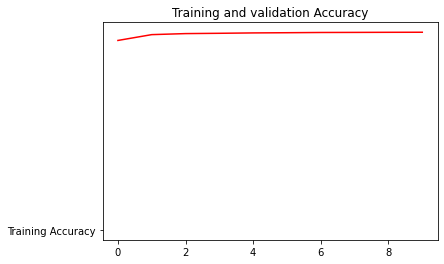

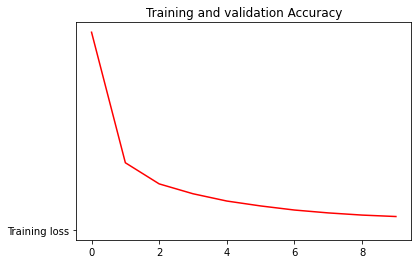

<Figure size 432x288 with 0 Axes>

In [19]:
acc=history.history['accuracy']
loss=history.history['loss']
epochs=range(len(acc))

plt.plot(epochs,acc,'r',"Training Accuracy")
plt.title("Training and validation Accuracy")
plt.figure()

plt.plot(epochs,loss,'r',"Training loss")
plt.title("Training and validation Accuracy")
plt.figure()

In [21]:
def cnn_test(ident):
    predict_results = model.predict(tf.reshape(test_images_scaled[ident],shape=(-1,28,28,1)))
    print(predict_results)
    print("Presivt:",np.argmax(predict_results),"     Practical:",test_labels[ident])
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(test_images_scaled[ident])
    plt.subplot(1,2,2)
    plt.imshow(predict_results)

print(test_images.shape)

(10000, 28, 28)


[[9.9999499e-01 4.5930295e-13 2.5803717e-12 4.5602228e-14 2.3690433e-12
  5.4938449e-13 5.0157969e-06 6.3090505e-10 7.0826234e-11 8.2114520e-09]]
Presivt: 0      Practical: 0


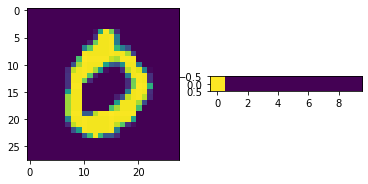

In [22]:
cnn_test(3)

In [6]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs =layer_outputs)

In [7]:
def show_cnn(ident):
    pred = activation_model.predict(test_images_scaled[ident].reshape(1,28,28,1))
    plt.figure(figsize =(32,32))
    for i in range(0,4):
        plt.subplot(4,4,i+1)
        plt.imshow(pred[0][0,:,:,i])
    for i in range(0,4):
        plt.subplot(4,4,i+5)
        plt.imshow(pred[1][0,:,:,i])
    for i in range(0,4):
        plt.subplot(4,4,i+9)
        plt.imshow(pred[2][0,:,:,i])
    for i in range(0,4):
        plt.subplot(4,4,i+13)
        plt.imshow(pred[3][0,:,:,i])

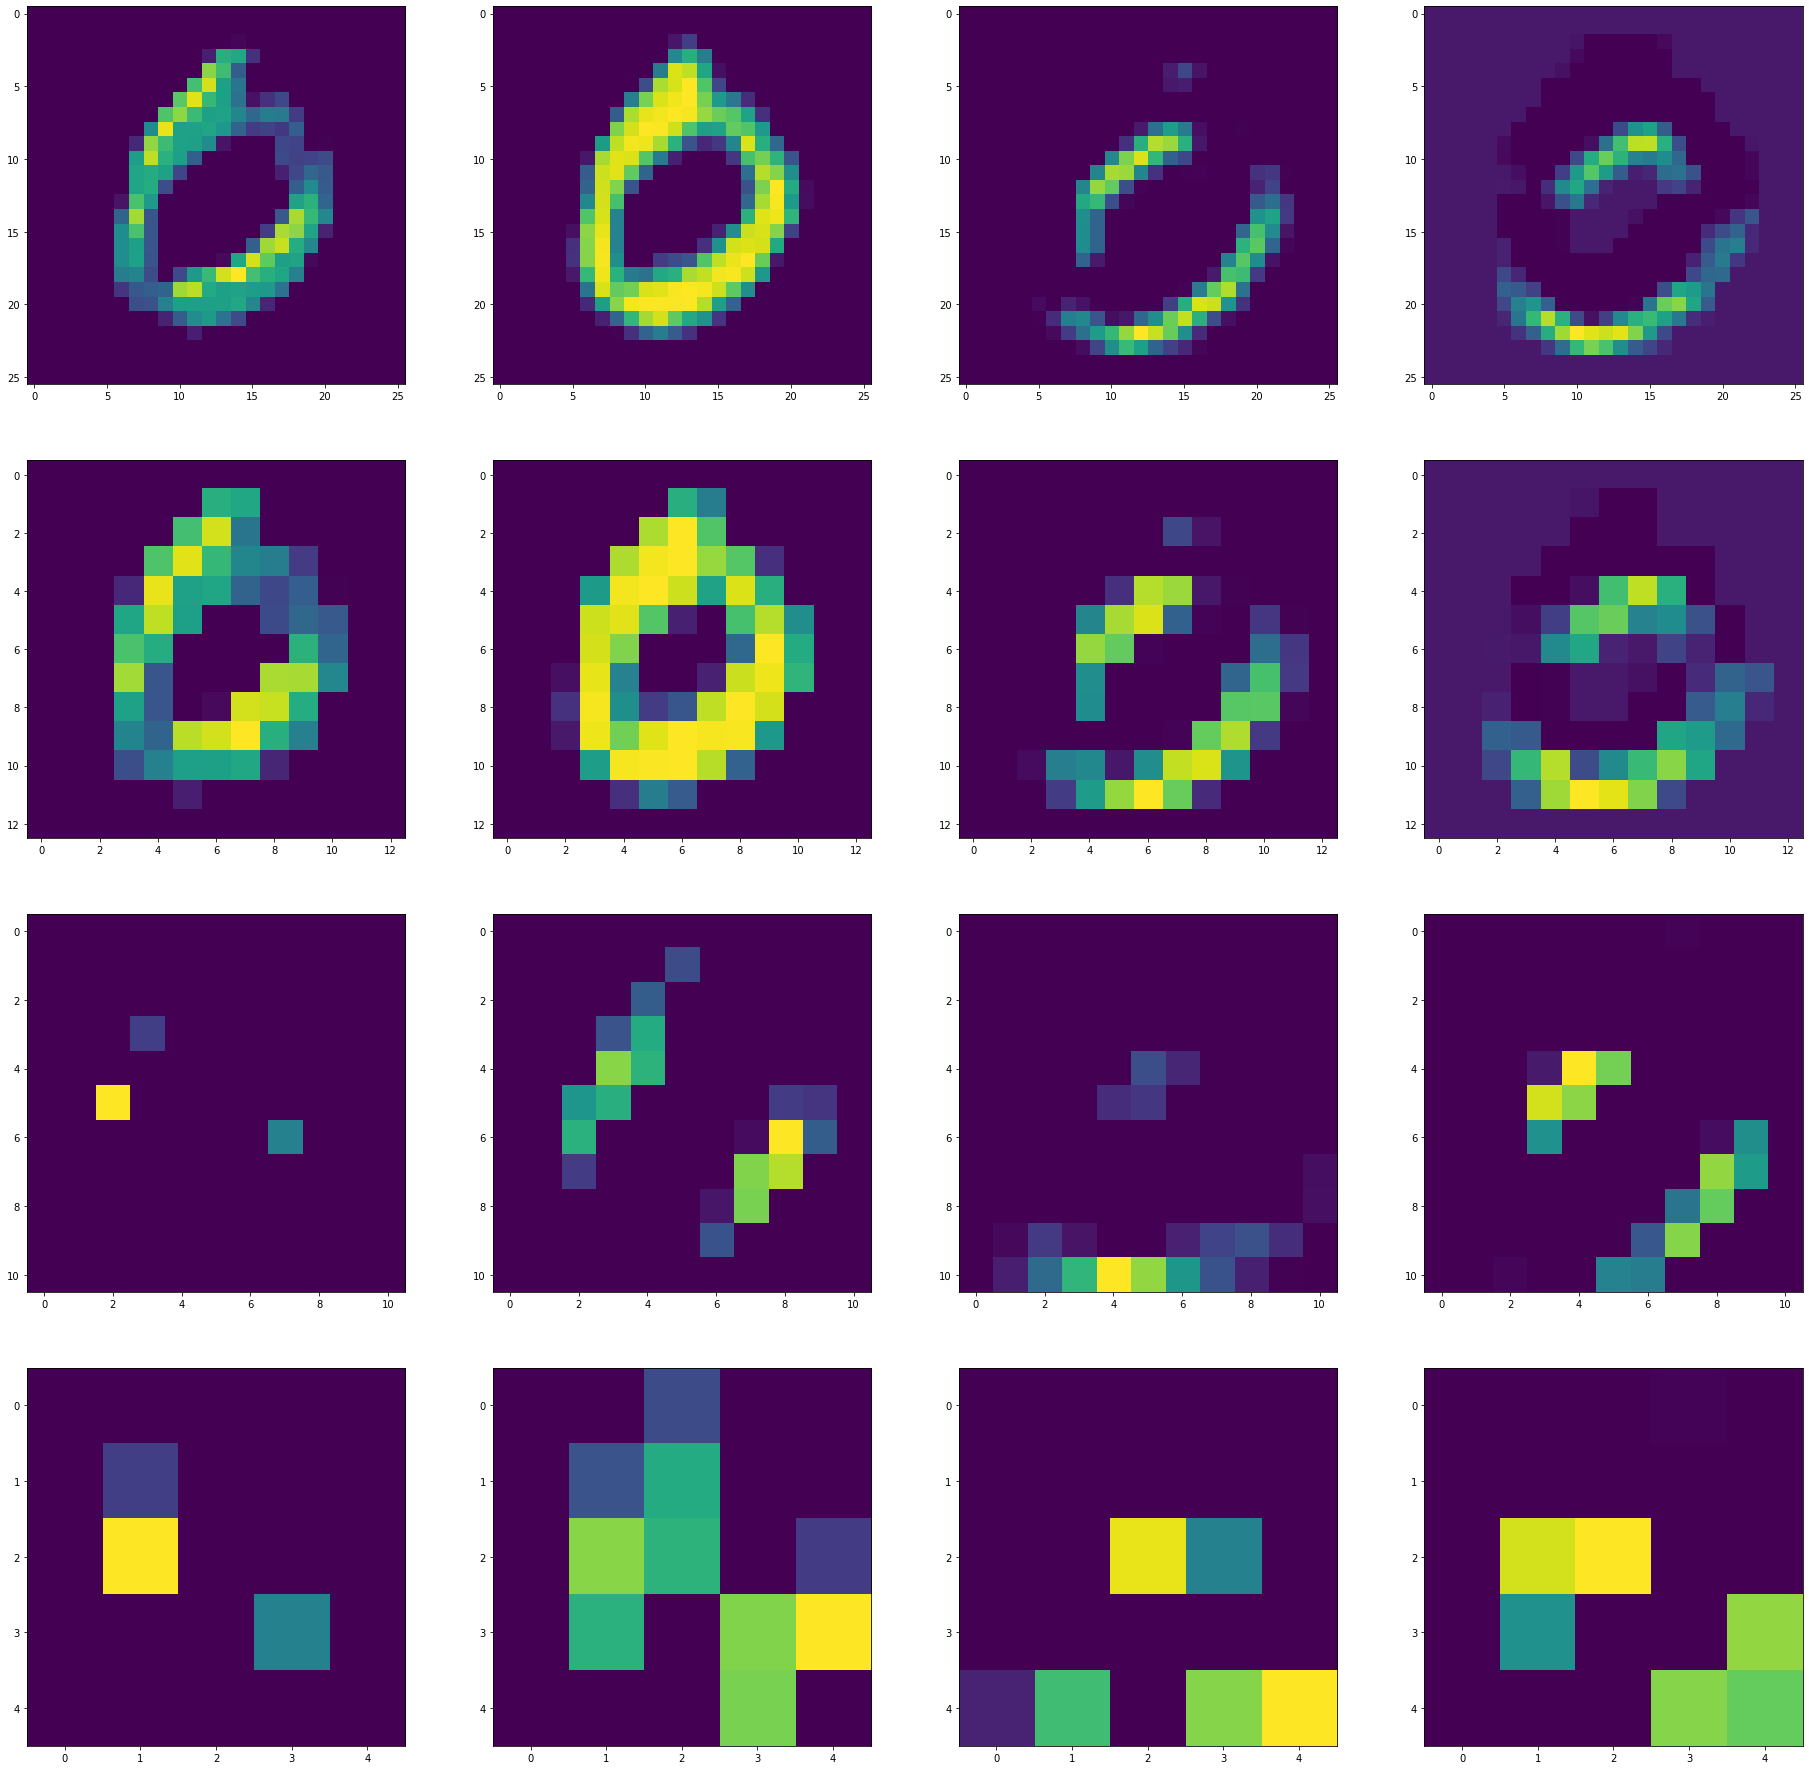

In [8]:
show_cnn(3)